In [1]:
# Part 1 Analysising Commercial vitality of four squares in Philly
import altair as alt
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Show all columns in dataframes
pd.options.display.max_columns = 999

In [3]:
# Hide warnings due to issue in shapely package 
# See: https://github.com/shapely/shapely/issues/1345
np.seterr(invalid="ignore");

In [4]:
import osmnx as ox

In [5]:
# Getting boundary from osm 
# which is a geodataframe
centercity = ox.geocode_to_gdf("center city, Philadelphia, PA")

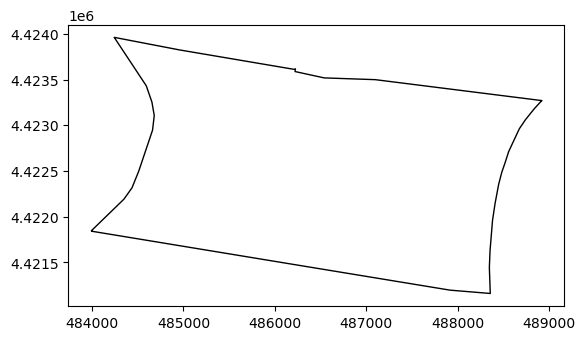

In [6]:
# Project it to UTM using OSMnx's function and Preview boundary
ax = ox.project_gdf(centercity).plot(fc="none", ec="black")

In [7]:
# Using polygon to download data
# Squeeze dgf so we can get the geometry polygon
centercity_outline = centercity.squeeze().geometry

In [95]:
# Downloading OSM features using "features_from_"
amenity = ox.features_from_polygon(centercity_outline, tags={"amenity": "restaurant"})

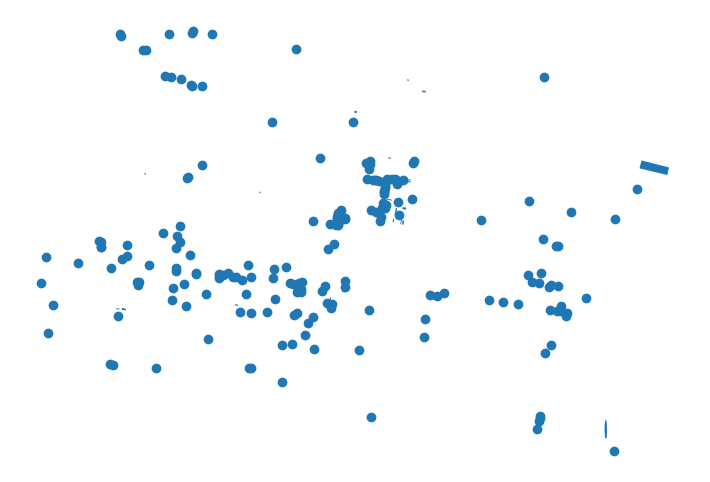

In [96]:
# plot it
fig, ax = plt.subplots(figsize=(10, 6))
ax = amenity.plot(ax=ax)
ax.set_axis_off()

In [100]:
n = amenity.explore(tiles="cartodb dark matter",
    color="yellow")
n

In [10]:
# Downloading OSM street network using "graph_from"
# specific network types
G = ox.graph_from_polygon(centercity_outline, network_type="drive")

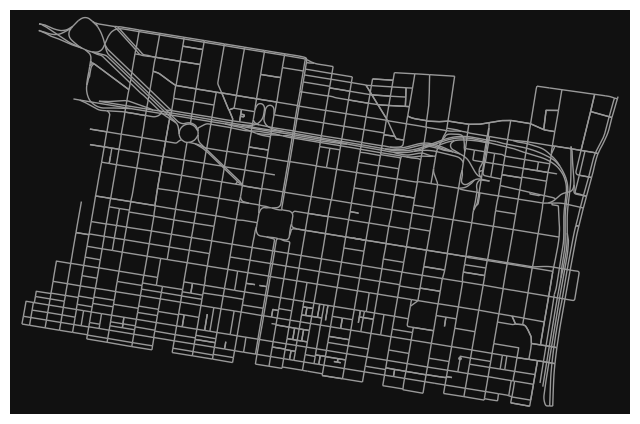

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
#project and plot it using OSMnx' "project_graph" and "plot_graph"
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected, node_size=0)

In [12]:
# converting a graph back to a geodataframe using OSMnx's function ox.graph_to_gdfs
cc_edges = ox.graph_to_gdfs(G, edges=True, nodes=False)

In [13]:
# use the `.explore()` function to get an interactive web map via Folium feed in a gdf
cc_edges.explore(tiles="cartodb positron")

In [14]:
# define the study sites as label : query
places = {"Philadelphia"  : "Philadelphia, PA, USA", "Manhattan" : "Manhattan, NYC, NY, USA","center city" :"center city, philadelphia, PA"}
places

{'Philadelphia': 'Philadelphia, PA, USA',
 'Manhattan': 'Manhattan, NYC, NY, USA',
 'center city': 'center city, philadelphia, PA'}

In [15]:
# get geocodes
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

geometry  bbox_north  bbox_south  \
0  POLYGON ((-75.28030 39.97500, -75.28022 39.974...   40.137959   39.867005   
1  MULTIPOLYGON (((-74.04721 40.69089, -74.04720 ...   40.882012   40.679654   
2  POLYGON ((-75.18743 39.94656, -75.16546 39.943...   39.965669   39.940478   

   bbox_east  bbox_west  place_id  osm_type    osm_id        lat        lon  \
0 -74.955831 -75.280298  14128726  relation    188022  39.952724 -75.163526   
1 -73.906769 -74.047207  15473406  relation   8398124  40.789624 -73.959894   
2 -75.129683 -75.187435   1564737  relation  13658130  39.950950 -75.157484   

      class            type  place_rank  importance addresstype          name  \
0  boundary  administrative          16    0.713797        city  Philadelphia   
1  boundary  administrative          14    0.675439      suburb     Manhattan   
2  boundary  administrative          20    0.416014      suburb   Center City   

                                        display_name  
0          Philadelphia, Pennsylvania, United States  
1  Manhattan, New York County, New York, United S...  
2  Center City, Philadelphia, Pennsylvania, Unite...

2023-12-07 19:38:23 Manhattan
2023-12-07 19:38:30 Philadelphia


C:\Users\83690\mambaforge\envs\musa-550-fall-2023\lib\site-packages\osmnx\plot.py:795: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


2023-12-07 19:39:07 center city


C:\Users\83690\mambaforge\envs\musa-550-fall-2023\lib\site-packages\osmnx\plot.py:795: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\83690\AppData\Local\Temp\ipykernel_14388\3090275978.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: 'images/street-orientations.png'

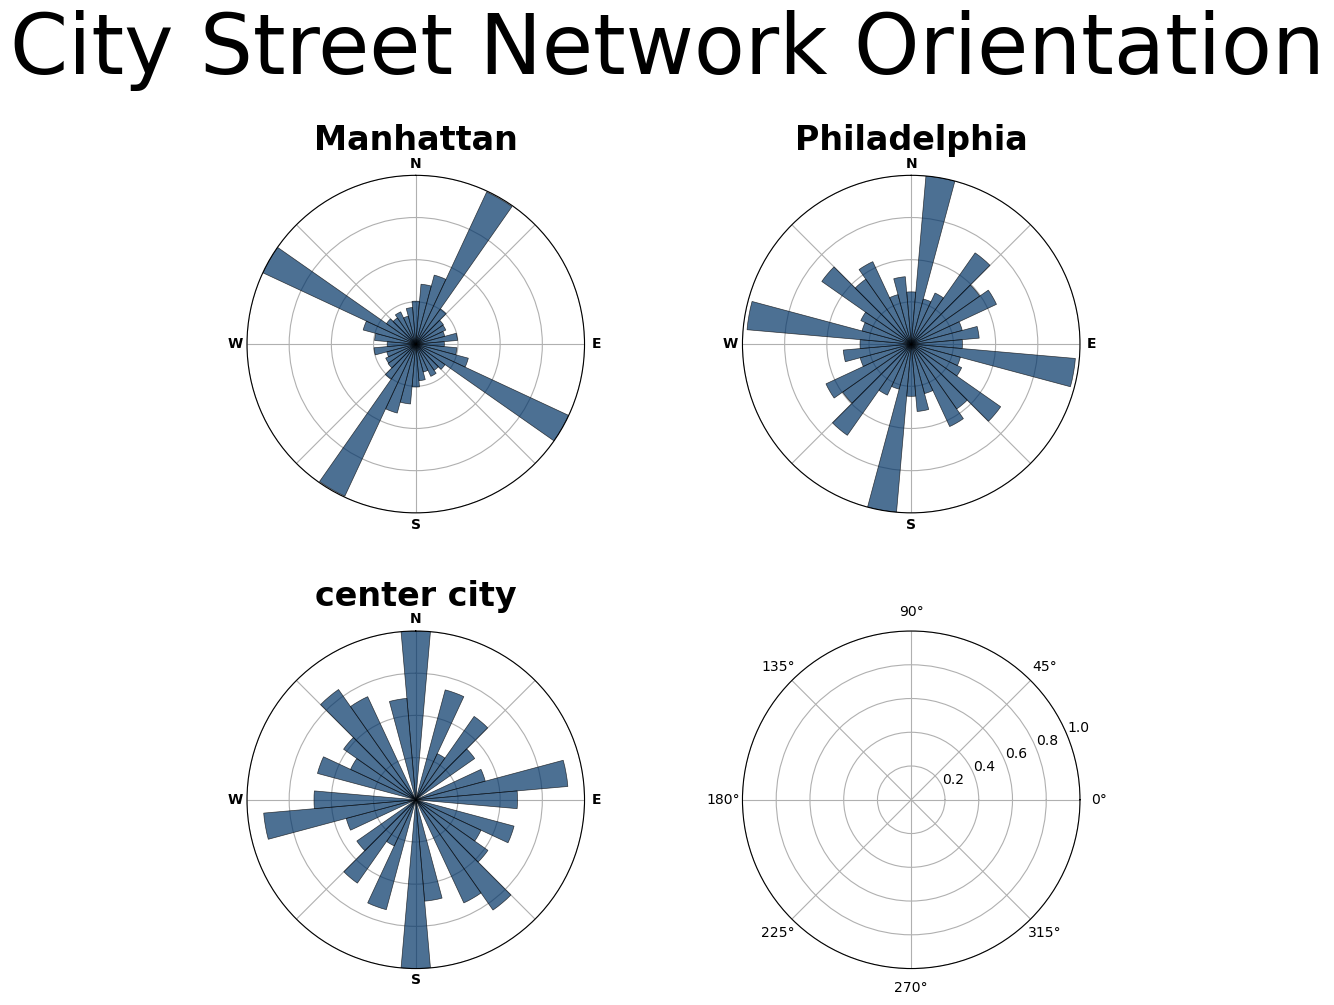

In [16]:
# Create a street network orientations graph
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

     # get undirected graphs with edge bearing attributes
    G_ = ox.graph_from_place(place, network_type="drive")
    Gu = ox.add_edge_bearings(ox.get_undirected(G_))
    fig, ax = ox.plot_orientation(Gu, ax=ax, title=place, area=True)
    
# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig.savefig("images/street-orientations.png", facecolor="w", dpi=100, bbox_inches="tight")
plt.close()

In [17]:
# get basic information of a graph project
ox.basic_stats(G)

{'n': 939,
 'm': 1761,
 'k_avg': 3.7507987220447285,
 'edge_length_total': 172590.69999999984,
 'edge_length_avg': 98.00721181147067,
 'streets_per_node_avg': 3.473908413205538,
 'streets_per_node_counts': {0: 0, 1: 18, 2: 2, 3: 446, 4: 465, 5: 6, 6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.019169329073482427,
  2: 0.002129925452609159,
  3: 0.4749733759318424,
  4: 0.4952076677316294,
  5: 0.006389776357827476,
  6: 0.002129925452609159},
 'intersection_count': 921,
 'street_length_total': 157771.55099999986,
 'street_segment_count': 1583,
 'street_length_avg': 99.66617245735935,
 'circuity_avg': 1.016528683676506,
 'self_loop_proportion': 0.0}

In [18]:
# get different feature from "https://wiki.openstreetmap.org/wiki/Map_features"
# use a polygon or a place name to get feature within a certain area
philly_tourism = ox.features_from_place("Philadelphia, PA", tags={"tourism": True})

In [19]:
philly_tourism.head()

ref                    geometry  ele gnis:county_id  \
element_type osmid                                                            
node         357371322  NaN  POINT (-75.19580 39.96970)   17            101   
             360500844  NaN  POINT (-75.19582 39.95352)  NaN            NaN   
             360515304  NaN  POINT (-75.14860 39.94771)  NaN            NaN   
             360542779  NaN  POINT (-75.18932 39.95540)  NaN            NaN   
             360777728  NaN  POINT (-75.19021 39.95230)  NaN            NaN   

                       gnis:created gnis:feature_id gnis:state_id  \
element_type osmid                                                  
node         357371322   08/23/2007         2347097            42   
             360500844          NaN             NaN           NaN   
             360515304          NaN             NaN           NaN   
             360542779          NaN             NaN           NaN   
             360777728          NaN             NaN           NaN   

                                                                     name  \
element_type osmid                                                          
node         357371322                              Bird Lake Picnic Area   
             360500844                                 Hilton Inn at Penn   
             360515304                                      Robert Morris   
             360542779                              Mario the Magnificent   
             360777728  Pennsylvania Historical Marker: ENIAC, first a...   

                            tourism   brand brand:wikidata  \
element_type osmid                                           
node         357371322  picnic_site     NaN            NaN   
             360500844        hotel  Hilton        Q598884   
             360515304      artwork     NaN            NaN   
             360542779      artwork     NaN            NaN   
             360777728  information     NaN            NaN   

                                   brand:wikipedia operator artwork_type  \
element_type osmid                                                         
node         357371322                         NaN      NaN          NaN   
             360500844  en:Hilton Hotels & Resorts   Hilton          NaN   
             360515304                         NaN      NaN       statue   
             360542779                         NaN      NaN       statue   
             360777728                         NaN      NaN          NaN   

                        historic  source   wikidata information artist_name  \
element_type osmid                                                            
node         357371322       NaN     NaN        NaN         NaN         NaN   
             360500844       NaN     NaN        NaN         NaN         NaN   
             360515304  memorial  survey        NaN         NaN         NaN   
             360542779       NaN     NaN  Q98563440         NaN         NaN   
             360777728       NaN     NaN        NaN       board         NaN   

                       material website addr:state gnis:county_name  \
element_type osmid                                                    
node         357371322      NaN     NaN        NaN              NaN   
             360500844      NaN     NaN        NaN              NaN   
             360515304      NaN     NaN        NaN              NaN   
             360542779      NaN     NaN        NaN              NaN   
             360777728      NaN     NaN        NaN              NaN   

                       gnis:reviewed  fee opening_hours amenity  \
element_type osmid                                                
node         357371322           NaN  NaN           NaN     NaN   
             360500844           NaN  NaN           NaN     NaN   
             360515304           NaN  NaN           NaN     NaN   
             360542779           NaN  NaN           NaN     NaN   
             360777728  

In [82]:
# How to find the name of the POI: search for keywords
philly_tourism.loc[philly_tourism['name'].str.contains("Bolt of", na=False)]

ref                    geometry  ele gnis:county_id  \
element_type osmid                                                             
node         5723840036  NaN  POINT (-75.14878 39.95546)  NaN            NaN   

                        gnis:created gnis:feature_id gnis:state_id  \
element_type osmid                                                   
node         5723840036          NaN             NaN           NaN   

                                                                      name  \
element_type osmid                                                           
node         5723840036  Bolt of Lightning: A Memorial to Benjamin Fran...   

                         tourism brand brand:wikidata brand:wikipedia  \
element_type osmid                                                      
node         5723840036  artwork   NaN            NaN             NaN   

                        operator  artwork_type historic source wikidata  \
element_type osmid                                                        
node         5723840036      NaN  installation      NaN    NaN      NaN   

                        information    artist_name material website  \
element_type osmid                                                    
node         5723840036         NaN  Isamu Noguchi    steel     NaN   

                        addr:state gnis:county_name gnis:reviewed  fee  \
element_type osmid                                                       
node         5723840036        NaN              NaN           NaN  NaN   

                        opening_hours amenity artwork_subject image  \
element_type osmid                                                    
node         5723840036           NaN     NaN             NaN   NaN   

                        start_date statue subject:wikidata colour wheelchair  \
element_type osmid                                                             
node         5723840036       1984    NaN              NaN    NaN        NaN   

                        wikipedia addr:city name:de designation description  \
element_type osmid                                                            
node         5723840036       NaN       NaN     NaN         NaN         NaN   

                        museum operator:type alt_name barrier heritage  \
element_type osmid                                                       
node         5723840036    NaN           NaN      NaN     NaN      NaN   

                        heritage:operator heritage:website nrhp:criteria  \
element_type osmid                                                         
node         5723840036               NaN              NaN           NaN   

                        nrhp:inscription_date nrhp:nhl protection_title  \
element_type osmid                                                        
node         5723840036                   NaN      NaN              NaN   

                        ref:nrhp source_ref artist:wikidata height name:fr  \
element_type osmid                                                           
node         5723840036      NaN        NaN             NaN    NaN     NaN   

                        addr:housenumber addr:postcode addr:street memorial  \
element_type osmid                                                            
node         5723840036              NaN           NaN         NaN      NaN   

                        year_of_construction name:ru layer phone check_date  \
element_type osmid                                                            
node         5723840036                  NaN     NaN   NaN   NaN        NaN   

                        contact:email name:en board_type toilets:wheelchair  \
element_type osmid                                                            
node         5723840036           NaN     NaN        NaN                NaN   

                        inscription subject:wikipedia level natural  \
element_type osmid                                              

In [77]:
Washington_square = philly_tourism.query("name == 'AKA Washington Square'").squeeze()
Washington_square

ref                                          NaN
geometry          POINT (-75.1551778 39.9490697)
ele                                          NaN
gnis:county_id                               NaN
gnis:created                                 NaN
                               ...              
area                                         NaN
subject                                      NaN
ways                                         NaN
type                                         NaN
place                                        NaN
Name: (node, 4436638558), Length: 171, dtype: object

In [78]:
Rittenhouse_square = philly_tourism.query("name == 'AKA Rittenhouse Square'").squeeze()
Rittenhouse_square

ref                                                             NaN
geometry          POLYGON ((-75.1704966 39.9505485, -75.1705679 ...
ele                                                             NaN
gnis:county_id                                                  NaN
gnis:created                                                    NaN
                                        ...                        
area                                                            NaN
subject                                                         NaN
ways                                                            NaN
type                                                            NaN
place                                                           NaN
Name: (way, 333316089), Length: 171, dtype: object

In [83]:
Franklin_square = philly_tourism.query("name == 'Bolt of Lightning: A Memorial to Benjamin Franklin'").squeeze()
Franklin_square

ref                                         NaN
geometry          POINT (-75.1487812 39.955465)
ele                                         NaN
gnis:county_id                              NaN
gnis:created                                NaN
                              ...              
area                                        NaN
subject                                     NaN
ways                                        NaN
type                                        NaN
place                                       NaN
Name: (node, 5723840036), Length: 171, dtype: object

In [84]:
Rittenhouse_square_x = Rittenhouse_square.geometry.centroid.x
Rittenhouse_square_y = Rittenhouse_square.geometry.centroid.y

In [85]:
Washington_square_x = Washington_square.geometry.x
Washington_square_y = Washington_square.geometry.y

In [86]:
Franklin_square_x = Franklin_square.geometry.x
Franklin_square_y = Franklin_square.geometry.y

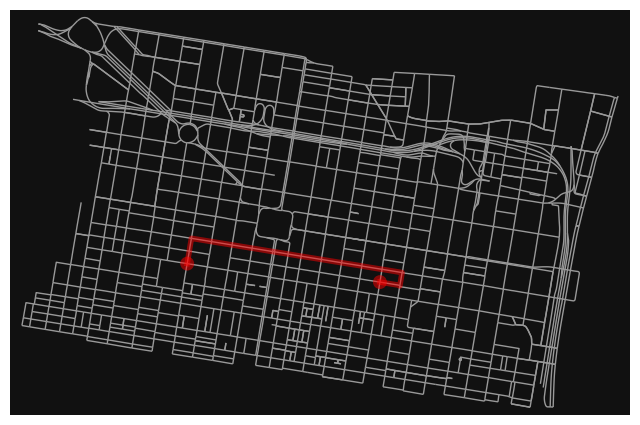

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [91]:
# get shortest path
orig_node = ox.nearest_nodes(G, Rittenhouse_square_x, Rittenhouse_square_y )
dest_node = ox.nearest_nodes(G, Washington_square_x, Washington_square_y )
route1 = ox.shortest_path(G, orig_node, dest_node, weight="length")
# visualizae
ox.plot_graph_route(G, route1, node_size=0)

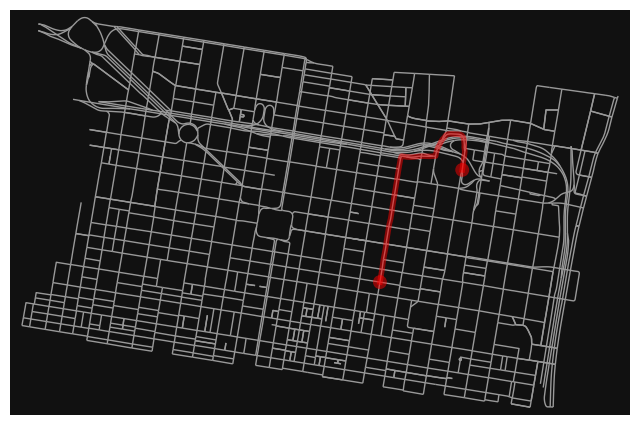

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [92]:
# get shortest path
orig_node = ox.nearest_nodes(G, Washington_square_x, Washington_square_y )
dest_node = ox.nearest_nodes(G, Franklin_square_x, Franklin_square_y )
route2 = ox.shortest_path(G, orig_node, dest_node, weight="length")
# visualizae
ox.plot_graph_route(G, route2, node_size=0)

In [101]:
m = ox.utils_graph.route_to_gdf(G, route1, weight="length").explore(
    tiles="cartodb dark matter",
    color="red",
)

m = ox.utils_graph.route_to_gdf(G, route2, weight="length").explore(
    tiles="cartodb dark matter",
    color="yellow",
    m=m
)

m = amenity.explore(tiles="cartodb dark matter",
    color="blue", m=m)

m

In [26]:
################## Pandana network analysis tool ##########################
import pandana as pnda
from pandana.loaders import osm

In [27]:
# first we need a boundary there are a few given by teacher
planning_districts = gpd.read_file(
    "https://opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson"
)

In [28]:
central_district = planning_districts.query("DIST_NAME == 'Central'")

In [29]:
central_district

OBJECTID_1  OBJECTID DIST_NAME ABBREV   Shape__Area  Shape__Length  \
3           4         9   Central    CTR  1.782880e+08    71405.14345   

   PlanningDist  DaytimePop                                           geometry  
3           NaN         NaN  POLYGON ((-75.14791 39.96733, -75.14715 39.967...

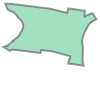

In [30]:
center_city_outline = central_district.squeeze().geometry

center_city_outline

In [31]:
boundary = center_city_outline.bounds
boundary

(-75.193582452986, 39.9286257450627, -75.1259307965391, 39.9738724134056)

In [32]:
[lng_min, lat_min, lng_max, lat_max] = boundary

In [33]:
poi_df = osm.node_query(lat_min, lng_min, lat_max, lng_max)
poi_df = poi_df.dropna(subset=["amenity"])

In [ ]:
###### create a chart analysising the number of each types of poi
chart = (
    alt.Chart(poi_df)
    .mark_bar()
    .encode(y=alt.Y("amenity", sort="-x"), x="count()", tooltip=["amenity", "count()"])
)

chart

In [34]:
net = osm.pdna_network_from_bbox(
    lat_min, lng_min, lat_max, lng_max, network_type="walk"
)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](39.92862575,-75.19358245,39.97387241,-75.12593080);>;);out;'}"
Downloaded 7,699.1KB from www.overpass-api.de in 1.04 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 1.14 seconds
Returning OSM data with 40,063 nodes and 12,633 ways...
Edge node pairs completed. Took 5.95 seconds
Returning processed graph with 18,558 nodes and 27,908 edges...
Completed OSM data download and Pandana node and edge table creation in 7.68 seconds


In [35]:
# sensible defaults
max_distance = 2000  # in meters
num_pois = 10  # only need the 10 nearest POI to each point in the network

## I can explore different amenity within this wbsite "https://wiki.openstreetmap.org/wiki/Map_features#Amenity"
AMENITIES = ["restaurant", "pub", "bar", "cafe"]
for amenity in AMENITIES:
    # get the subset of amenities for this type
    pois_subset = poi_df[poi_df["amenity"] == amenity]

    # set the POI, using the longitude and latitude of POI
    net.set_pois(
        amenity, max_distance, num_pois, pois_subset["lon"], pois_subset["lat"]
    )

In [36]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (lat_max - lat_min) / (lng_max - lng_min)
fig_kwargs = {"facecolor": "w", "figsize": (10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {"s": 20, "alpha": 0.9, "cmap": "viridis_r", "edgecolor": "none"}

In [37]:
## plot the walking distance to the nearest POI
# First calculate it
amenity = "bar"
access = net.nearest_pois(distance=2000, category=amenity, num_pois=num_pois)

In [38]:
# Merge the nodes and the distance to POIs
nodes = pd.merge(net.nodes_df, access, left_index=True, right_index=True)

# Make into a geodataframe
nodes = gpd.GeoDataFrame(
    nodes, geometry=gpd.points_from_xy(nodes["x"], nodes["y"]), crs="EPSG:4326"
)

In [71]:
## Then plot it
def plot_walking_distance(net, amenity, distance=1000, n=1):
    """
    Plot the walking distance to the specified amenity
    """
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    # subset of POI
    poi_subset = poi_df[poi_df["amenity"] == amenity]

    # get the distances to nearest num_pois POI
    access = net.nearest_pois(distance=1000, category=amenity, num_pois=num_pois)

    # merge node positions and distances to nearest PO
    nodes = pd.merge(net.nodes_df, access, left_index=True, right_index=True)
    nodes = gpd.GeoDataFrame(
        nodes, geometry=gpd.points_from_xy(nodes["x"], nodes["y"]), crs="EPSG:4326"
    )

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # plot the distance to the nth nearest amenity
    ax = nodes.plot(ax=ax, cax=cax, column=nodes[n], legend=True, **plot_kwargs)

    #### add the amenities as stars
    #for i, row in poi_subset.iterrows():
        #ax.scatter(row["lon"], row["lat"], color="red", s=100, marker="*")

    # format
    ax.set_facecolor("black")
    ax.figure.set_size_inches(fig_kwargs["figsize"])

    # set extent
    [xmin, ymin, xmax, ymax] = nodes.geometry.total_bounds
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    return ax

Text(0.5, 1.0, 'Walking distance to the nearest bar')

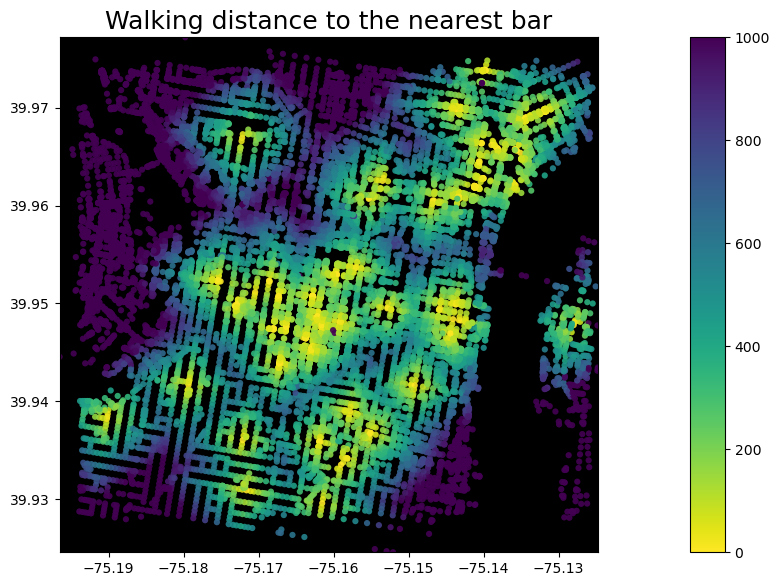

In [72]:
# specific use which one
# wakling distance to the n=? th nearest "???s"
ax = plot_walking_distance(net, "bar", n=1)
ax.set_title("Walking distance to the nearest bar", fontsize=18)

Text(0.5, 1.0, 'Walking distance to the nearest restaurant')

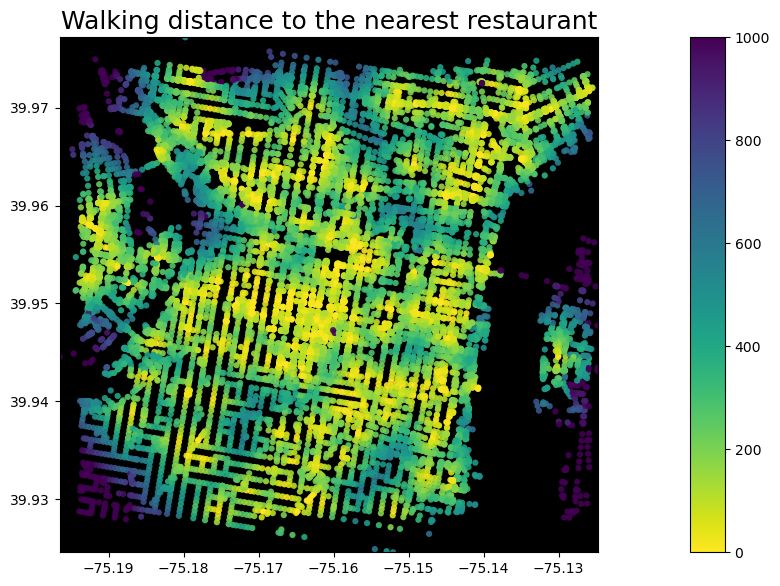

In [50]:
ax = plot_walking_distance(net, "restaurant", n=1)
ax.set_title("Walking distance to the nearest restaurant", fontsize=18)

Text(0.5, 1.0, 'Walking distance to the nearest pub')

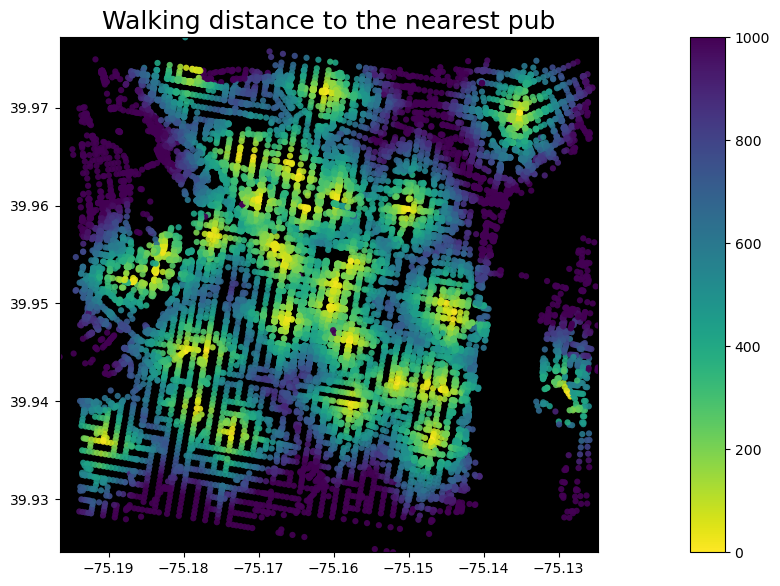

In [73]:
ax = plot_walking_distance(net, "pub", n=1)
ax.set_title("Walking distance to the nearest pub", fontsize=18)

Text(0.5, 1.0, 'Walking distance to the nearest cafe')

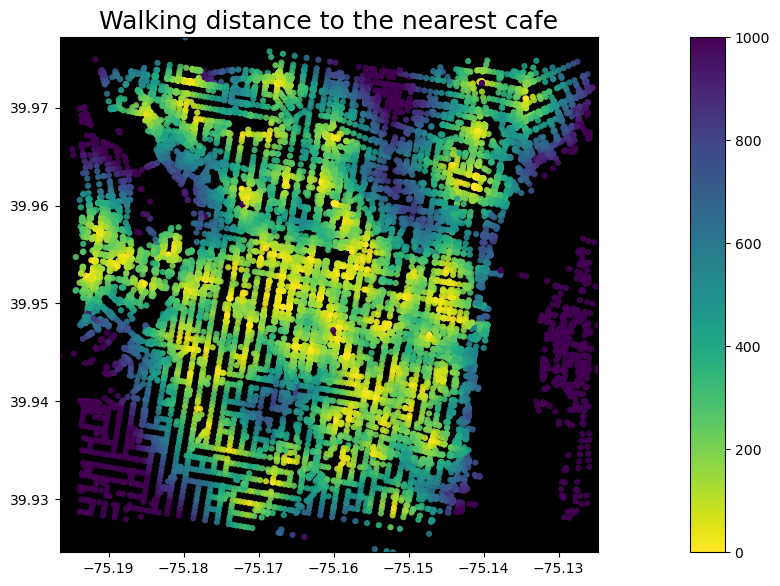

In [74]:
ax = plot_walking_distance(net, "cafe", n=1)
ax.set_title("Walking distance to the nearest cafe", fontsize=18)